In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
platform.system()

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
    
plt.rc('axes', unicode_minus=False) 

In [46]:
df1=pd.read_csv('Challenger_Ranked_Games.csv', encoding='cp949')

In [47]:
df1.info()

#blueInhibitorKills = 억제기제거 횟수
#WardPlaced = 와드 설치 횟수
#KillingSpree = 연속킬 횟수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

In [48]:
df1.head(5)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


In [49]:
#blue팀으로 한정

df1=df1.iloc[:,:26]

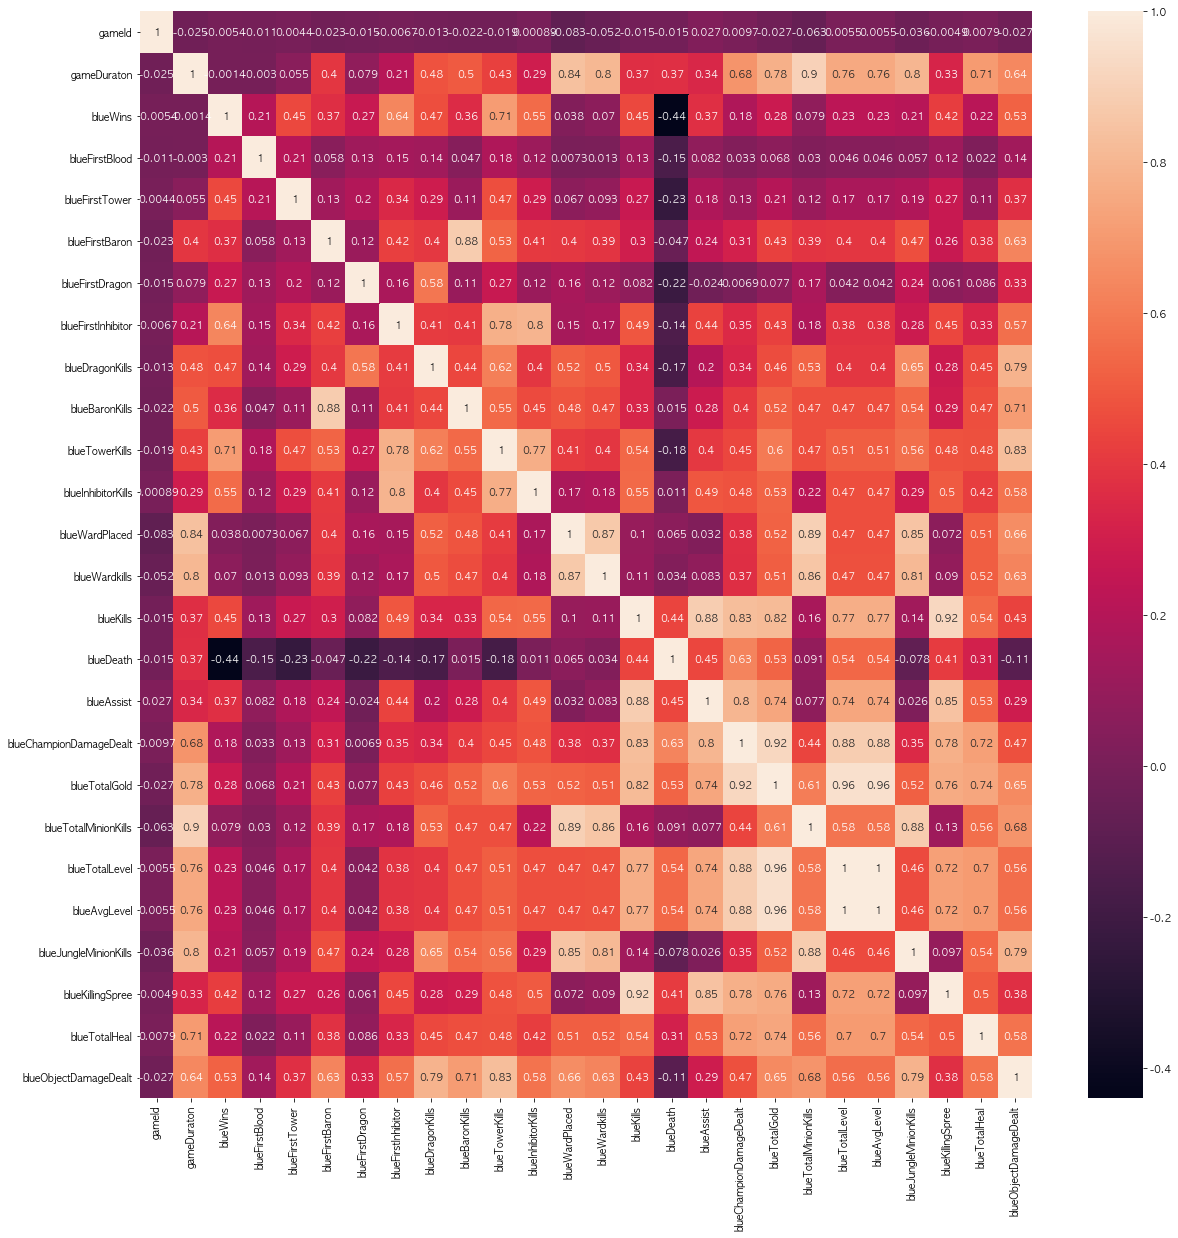

In [50]:
#상관계수 히트맵을 통해 중요변수 산출

plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True)

In [51]:
#초단위를 분단위로 변환

df1.gameDuraton=round(df1.gameDuraton.apply(lambda x: x/60))  

In [52]:
#다시하기 / 15분미만 게임데이터 삭제

df1=df1[df1.gameDuraton>13]

In [53]:
#첼린저 경기에 와드 설치 개수가 10개 미만은 좋지 않은 데이터로 판단 해당 데이터 행 제거

df1=df1[df1.blueWardPlaced>10]

Text(0, 0.5, 'Wins')

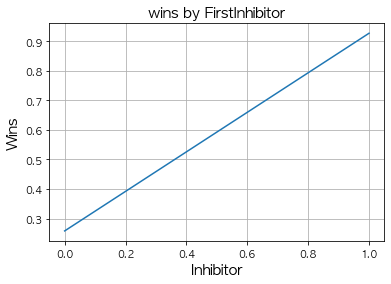

In [54]:
# 첫억제기 파괴와 팀 승리가 강한선형 관계 첫 억제기에 대한 벨런스 조절 필요성 대두 

plt.plot(df1.groupby('blueFirstInhibitor').mean()['blueWins'])
plt.grid()

plt.title('wins by FirstInhibitor', fontsize=15)
plt.xlabel('Inhibitor', fontsize=15)
plt.ylabel('Wins', fontsize=15)

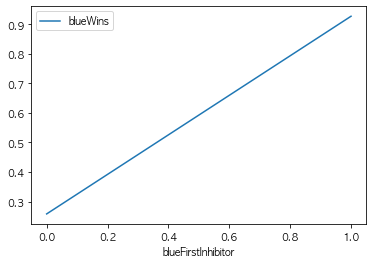

In [55]:
df1.pivot_table(index='blueFirstInhibitor', values='blueWins').plot()

In [56]:
df1.blueFirstInhibitor.value_counts()

0    15473
1     8734
Name: blueFirstInhibitor, dtype: int64

In [57]:
df1.blueWins.value_counts()

0    12114
1    12093
Name: blueWins, dtype: int64

In [58]:
# 첫 억제기를 파괴당하면 질 확률이 47%

df1.blueWins[(df1.blueFirstInhibitor==0) & (df1.blueWins==0)].count()*100/24207

47.411905647126865

In [71]:
from sklearn.model_selection import train_test_split
x = df1[['blueFirstInhibitor']] 
y = df1[['blueWins']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [73]:
model = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(x, y)
model2 = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0).fit(x, y)

/Users/namwook-kang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/Users/namwook-kang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [74]:
# 모델
y_pred = model2.predict(x_test)
print(y_pred)
print(list(y_test))

[1 1 1 ... 0 0 0]
['blueWins']


In [75]:
# 첫 억제기 변수만 가지고 80예측 가능
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.8013217678645188


In [65]:
#여러 변수로 승리를 예측 하였을때
x = df1[['blueFirstInhibitor', 'blueTowerKills', 'blueInhibitorKills', 'blueFirstTower', 'blueDragonKills', 'blueKills', 'blueKillingSpree', 'blueObjectDamageDealt']] 
y = df1[['blueWins']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [66]:
model = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(x, y)
model2 = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0).fit(x, y)

/Users/namwook-kang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/Users/namwook-kang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [69]:
# 모델
y_pred = model2.predict(x_test)
print(y_pred)
print(list(y_test))

[0 0 1 ... 1 0 1]
['blueWins']


In [70]:
# 여러 변수를 포함한 예측은 86%
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.8628665840561751
